In [1]:
import pandas as pd
from scipy.io import arff
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import mean_squared_error

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


FOLDS =10
%matplotlib inline


# **Understanding Data**

In [30]:
def cont_age(field):
    plt.figure()
    g = None
    if field == "Age":
        df_query_mri = df[df["Age"] > 0]
        g = sns.countplot(df_query_mri["Age"])
        g.figure.set_size_inches(18.5, 10.5)
    else:
        g = sns.countplot(df[field])
        g.figure.set_size_inches(18.5, 10.5)
    
sns.despine()

<Figure size 432x288 with 0 Axes>

In [31]:
# Function to graph number of people per state [Demented, Nondemented]
def cont_Dementes(field):
    plt.figure()
    g = None
    if field == "Group":
        df_query_mri = df[df["Group"] >= 0]
        g = sns.countplot(df_query_mri["Group"])
        g.figure.set_size_inches(18.5, 10.5)
    else:
        g = sns.countplot(df[field])
        g.figure.set_size_inches(18.5, 10.5)
    
sns.despine()

<Figure size 432x288 with 0 Axes>

In [32]:
# 0 = F y 1= M
def bar_chart(feature):
    Demented = df[df['Group']==1][feature].value_counts()
    Nondemented = df[df['Group']==0][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))

In [33]:
def report_performance(model):

    model_test = model.predict(X_test)

    print("Confusion Matrix")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("")
    print("Classification Report")
    print(metrics.classification_report(y_test, model_test))

In [34]:
data = '/content/oasis_longitudinal (1).csv'
df = pd.read_csv (data)
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [35]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [36]:
nu = pd.DataFrame(df['Group']=='Nondemented')
nu["Group"].value_counts() 

True     190
False    183
Name: Group, dtype: int64

**Correlation Analysis**

<ipython-input-37-02ece0d214e1>:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot:>

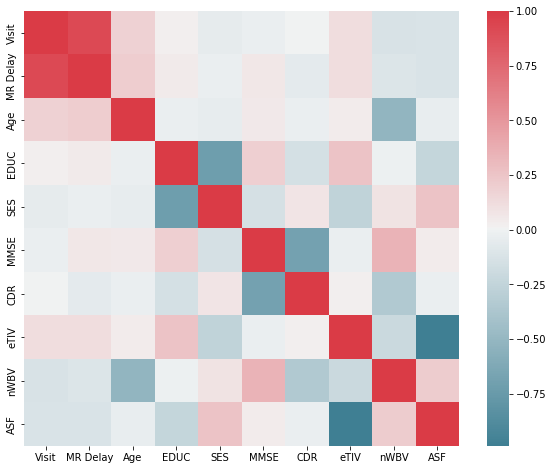

In [37]:
f, ax = plt.subplots(figsize=(10, 8)) 
corr = df.corr(method = 'pearson') 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            square=True, ax=ax) 

**Correlation matrix**

In [38]:
df.corr(method = 'pearson') 

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Visit,1.000000,0.920009,0.183213,0.024615,-0.051622,-0.029078,0.002325,0.117428,-0.126682,-0.120399
MR Delay,0.920009,1.000000,0.205357,0.051630,-0.030813,0.065844,-0.062915,0.119624,-0.105586,-0.123545
Age,0.183213,0.205357,1.000000,-0.027886,-0.046857,0.055612,-0.026257,0.042348,-0.518359,-0.035067
EDUC,0.024615,0.051630,-0.027886,1.000000,-0.722647,0.194884,-0.153121,0.257015,-0.012200,-0.241752
SES,-0.051622,-0.030813,-0.046857,-0.722647,1.000000,-0.149219,0.076160,-0.261575,0.090095,0.255576
MMSE,-0.029078,0.065844,0.055612,0.194884,-0.149219,1.000000,-0.686519,-0.032084,0.341912,0.040052
CDR,0.002325,-0.062915,-0.026257,-0.153121,0.076160,-0.686519,1.000000,0.022819,-0.344819,-0.029340
eTIV,0.117428,0.119624,0.042348,0.257015,-0.261575,-0.032084,0.022819,1.000000,-0.210122,-0.988877
nWBV,-0.126682,-0.105586,-0.518359,-0.012200,0.090095,0.341912,-0.344819,-0.210122,1.000000,0.213476
ASF,-0.120399,-0.123545,-0.035067,-0.241752,0.255576,0.040052,-0.029340,-0.988877,0.213476,1.000000


/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



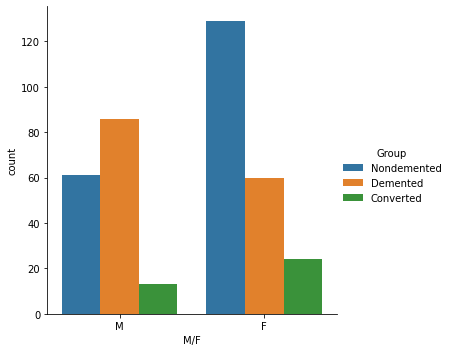

In [39]:
import seaborn as sb
sb.factorplot('M/F',data=df,hue='Group',kind="count")

**Variation of Dementia**

(12.5, 30.0)

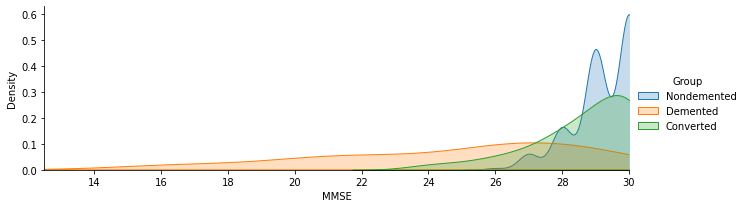

In [40]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(12.5)

**Number of Patients of each age**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



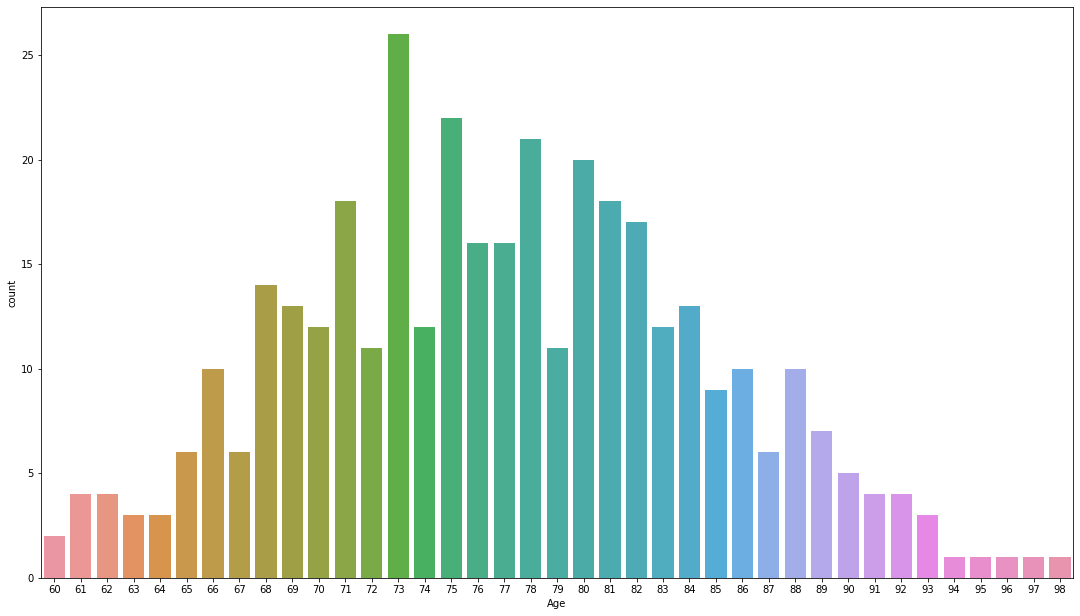

In [41]:
cont_age("Age")

# **Data Pre-Processing**

**Replacing**

In [44]:
# Replace all occurrences of the string 'Converted' in the 'Group' column with the string 'Demented'
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])

**Removal Of Uneccessary Coloumns**

In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# replace all occurrences of the string 'Converted' in the 'Group' column with 'Demented'
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])

# convert 'Group' to numeric values (1 for Demented, 0 for Nondemented)
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1, 0])

# convert 'M/F' to numeric values (1 for M, 0 for F)
df['M/F'] = df['M/F'].replace(['M', 'F'], [1, 0])


**LabelEncoder**

In [51]:
# encode 'Hand' column using LabelEncoder
encoder = LabelEncoder()
df['Hand'] = encoder.fit_transform(df['Hand'])

# impute missing values in 'SES' column with the most frequent value
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[['SES']] = imputer.fit_transform(df[['SES']])

# impute missing values in 'MMSE' column with the median
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[['MMSE']] = imputer.fit_transform(df[['MMSE']])

# normalize the numeric columns using StandardScaler
scaler = StandardScaler()
df[['Age', 'MR Delay', 'M/F', 'Hand', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] = scaler.fit_transform(df[['Age', 'MR Delay', 'M/F', 'Hand', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']])


In [53]:
from sklearn.preprocessing import StandardScaler
df_norm = df
scaler = StandardScaler()
df_norm[['Age','MR Delay','M/F','Hand','EDUC','SES','MMSE','eTIV','nWBV','ASF']]=scaler.fit_transform(df[['Age','MR Delay','M/F','Hand','EDUC','SES','MMSE','eTIV','nWBV','ASF']])

In [54]:
df_norm.head(3)

,Group,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,0,-0.937715,1.153798,0.0,1.308738,-0.208132,-0.394466,-0.095686,2.836059,-0.905169,-2.265742
1,0,-0.217613,1.153798,0.0,1.439787,-0.208132,-0.394466,0.721664,2.932703,-1.309643,-2.316501
2,1,-0.937715,1.153798,0.0,-0.263856,-0.904394,-0.394466,-1.185486,1.079409,0.173429,-1.083784


In [55]:
df.drop(['Hand'], axis = 1, inplace = True, errors = 'ignore')
df.drop(['MR Delay'], axis = 1, inplace = True, errors = 'ignore')

In [56]:
df.head()

,Group,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,0,1.153798,1.308738,-0.208132,-0.394466,-0.095686,2.836059,-0.905169,-2.265742
1,0,1.153798,1.439787,-0.208132,-0.394466,0.721664,2.932703,-1.309643,-2.316501
2,1,1.153798,-0.263856,-0.904394,-0.394466,-1.185486,1.079409,0.173429,-1.083784
3,1,1.153798,-0.132806,-0.904394,-0.394466,0.176764,1.420506,-0.446765,-1.344830
4,1,1.153798,0.391392,-0.904394,-0.394466,-1.457936,1.193108,-0.770344,-1.170800


# **Modeling**

In [57]:
data_test = df

In [58]:
X = data_test.drop(["Group"],axis=1)
y = data_test["Group"].values
X.head(3)

,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,1.153798,1.308738,-0.208132,-0.394466,-0.095686,2.836059,-0.905169,-2.265742
1,1.153798,1.439787,-0.208132,-0.394466,0.721664,2.932703,-1.309643,-2.316501
2,1.153798,-0.263856,-0.904394,-0.394466,-1.185486,1.079409,0.173429,-1.083784


In [59]:
# We divide our data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [60]:
print("Original Demented : {0} ({1:0.2f}%)".format(len(df_norm.loc[df_norm['Group'] == 1]), 100 * (len(df_norm.loc[df_norm['Group'] == 1]) / len(df_norm))))
print("Original Nondemented : {0} ({1:0.2f}%)".format(len(df_norm.loc[df_norm['Group'] == 0]), 100 * (len(df_norm.loc[df_norm['Group'] == 0]) / len(df_norm))))
print("")
print("Training Demented : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), 100 * (len(y_train[y_train[:] == 1]) / len(y_train))))
print("Training Nondemented : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), 100 * (len(y_train[y_train[:] == 0]) / len(y_train))))
print("")
print("Test Demented : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), 100 * (len(y_test[y_test[:] == 1]) / len(y_test))))
print("Test Nondemented : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), 100 * (len(y_test[y_test[:] == 0]) / len(y_test))))

Original Demented : 183 (49.06%)
Original Nondemented : 190 (50.94%)

Training Demented : 139 (49.82%)
Training Nondemented : 140 (50.18%)

Test Demented : 44 (46.81%)
Test Nondemented : 50 (53.19%)


**Tuning Hyperparameters for better models**

Random Forest

In [61]:
# Number of trees in random forest
n_estimators = range(10,250)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = range(1,40)
# Minimum number of samples required to split a node
min_samples_split = range(3,60)

In [62]:
# Create the random grid
parametro_rf = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

In [63]:
model_forest = RandomForestClassifier(n_jobs=-1)
forest_random = RandomizedSearchCV(estimator = model_forest, param_distributions = parametro_rf, n_iter = 100, cv = FOLDS, 
                               verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_absolute_error')
forest_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': range(1, 40),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': range(3, 60),
                                        'n_estimators': range(10, 250)},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [64]:
forest_random.best_params_

{'n_estimators': 46,
 'min_samples_split': 3,
 'max_features': 'sqrt',
 'max_depth': 20}

In [65]:
model_rf = forest_random.best_estimator_
model_rf =  RandomForestClassifier(n_estimators=60,min_samples_split=8,max_features='sqrt',max_depth= 37)
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=37, min_samples_split=8, n_estimators=60)

In [66]:
test_score = cross_val_score(model_rf, X_train, y_train, cv=FOLDS, scoring='roc_auc').mean()
test_score

0.9004317111459971

In [67]:
test_score = cross_val_score(model_rf, X_train, y_train, cv=FOLDS, scoring='accuracy').mean()
test_score

0.817063492063492

In [68]:
Predicted_rf= model_rf.predict(X_test)
test_recall = recall_score(y_test, Predicted_rf, pos_label=1)
fpr, tpr, thresholds = roc_curve(y_test, Predicted_rf, pos_label=1)
test_auc = auc(fpr, tpr)

**ADAboost**

In [69]:
n_estimators = range(10,200)

learning_rate = [0.0001, 0.001, 0.01, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,1]

In [70]:
# Create the random grid
parametros_ada = {'n_estimators': n_estimators,
               'learning_rate': learning_rate}

In [71]:
model_ada = AdaBoostClassifier()

ada_random = RandomizedSearchCV(estimator = model_ada, param_distributions = parametros_ada, n_iter = 100, cv = FOLDS, 
                               verbose=2, random_state=42, n_jobs = -1, scoring='roc_auc')
ada_random.fit(X_train, y_train)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9, 0.95, 1],
                                        'n_estimators': range(10, 200)},
                   random_state=42, scoring='roc_auc', verbose=2)

In [72]:
ada_random.best_params_

{'n_estimators': 110, 'learning_rate': 0.6}

**Gradient Boosting**

In [73]:
parametros_gb = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.005,0.5, 0.075, 0.1, 0.15, 0.2,0.3,0.8,0.9],
    "min_samples_split": [0.01, 0.025, 0.005,0.4,0.5, 0.075, 0.1, 0.15, 0.2,0.3,0.8,0.9],
    "min_samples_leaf": [1,2,3,5,8,10,15,20,40,50,55,60,65,70,80,85,90,100],
    "max_depth":[3,5,8,10,15,20,25,30,40,50],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":range(1,100)
    }

In [74]:
model_gb= GradientBoostingClassifier()


gb_random = RandomizedSearchCV(estimator = model_gb, param_distributions = parametros_gb, n_iter = 100, cv = FOLDS, 
                               verbose=2, random_state=42, n_jobs = -1, scoring='roc_auc')
gb_random.fit(X_train, y_train)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


530 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
238 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/_pa

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse', 'mae'],
                                        'learning_rate': [0.01, 0.025, 0.005,
                                                          0.5, 0.075, 0.1, 0.15,
                                                          0.2, 0.3, 0.8, 0.9],
                                        'loss': ['deviance'],
                                        'max_depth': [3, 5, 8, 10, 15, 20, 25,
                                                      30, 40, 50],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5, 8, 10,
                                                             15, 20, 40, 50, 55,
                                                             60, 65, 70, 80, 85,
                                                             90, 100],
                                        'min_samples_split': [0.01, 0.025,
                                                              0.005, 0.4, 0.5,
                                                              0.075, 0.1, 0.15,
                                                              0.2, 0.3, 0.8,
                                                              0.9],
                                        'n_estimators': range(1, 100),
                                        'subsample': [0.5, 0.618, 0.8, 0.85,
                                                      0.9, 0.95, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [89]:
gb_random.best_params_

{'subsample': 0.95,
 'n_estimators': 96,
 'min_samples_split': 0.15,
 'min_samples_leaf': 5,
 'max_features': 'log2',
 'max_depth': 50,
 'loss': 'deviance',
 'learning_rate': 0.15,
 'criterion': 'friedman_mse'}

**SVM**

In [76]:
C = [0.001, 0.10, 0.1, 10, 25, 50,65,70,80,90, 100, 1000,2000,10000,20000,25000,30000,40000]

kernel =  ['rbf']
    
gamma =[1e-2, 1e-3, 1e-4, 1e-5,1e-6,1e-7,1e-8,1]

In [77]:
# Create the random grid
parametros_svm = {'C': C,
            'gamma': gamma,
             'kernel': kernel}

In [78]:
model_svm = SVC()
from sklearn.model_selection import GridSearchCV
svm_random = GridSearchCV(model_svm, parametros_svm,  cv = 20, 
                               verbose=2, n_jobs = -1, scoring='roc_auc')
svm_random.fit(X, y)

Fitting 20 folds for each of 144 candidates, totalling 2880 fits


GridSearchCV(cv=20, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 0.1, 10, 25, 50, 65, 70, 80, 90, 100,
                               1000, 2000, 10000, 20000, 25000, 30000, 40000],
                         'gamma': [0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07,
                                   1e-08, 1],
                         'kernel': ['rbf']},
             scoring='roc_auc', verbose=2)

In [90]:
svm_random.best_params_

{'C': 20000, 'gamma': 1e-05, 'kernel': 'rbf'}

**XGboost**

In [79]:
param_xgb = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [50,100,120]}

In [80]:
from sklearn.model_selection import GridSearchCV

model_xgb = xgb.XGBClassifier()
xgb_random = RandomizedSearchCV(estimator = model_xgb, param_distributions = param_xgb, n_iter = 100, cv = FOLDS, 
                               verbose=2, random_state=42, n_jobs = -1, scoring='roc_auc')
xgb_random.fit(X_train.values, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[15:25:12] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                        'colsample_bytree': [0.4, 0.5, 0.6, 0.7,
                                                             0.8, 0.9, 1.0],
                                        'gamma': [0, 0.25, 0.5, 1.0],
                                        'learning_rate': [0.001, 0.01, 0.1, 0.2,
                                                          0, 3],
                                        'max_depth': [6, 10, 15, 20],
                                        'min_child_weight': [0.5, 1.0, 3.0, 5.0,
                                                             7.0, 10.0],
                                        'n_estimators': [50, 100, 120],
                                        'reg_lambda': [0.1, 1.0, 5.0, 10.0,
                                                       50.0, 100.0],
                                        'silent': [False],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1.0]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [81]:
xgb_random.best_params_

{'subsample': 0.6,
 'silent': False,
 'reg_lambda': 0.1,
 'n_estimators': 120,
 'min_child_weight': 1.0,
 'max_depth': 6,
 'learning_rate': 0.01,
 'gamma': 0.25,
 'colsample_bytree': 0.9,
 'colsample_bylevel': 0.4}

**Selected Parameters**

In [83]:
parametro_rf = forest_random.best_params_

parametro_ada = ada_random.best_params_

parametro_gb = gb_random.best_params_

parametro_svm = svm_random.best_params_

parametro_xgb= xgb_random.best_params_

**Cross Validation**

In [92]:
kf = KFold(n_splits=FOLDS, random_state = 0, shuffle = True)
for i, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    Xtrain, Xval = X_train.values[train_index], X_train.values[val_index]
    ytrain, yval = y_train[train_index], y_train[val_index]
    
    model_rf.fit(Xtrain, ytrain)
    model_ada.fit(Xtrain, ytrain)
    model_gb.fit(Xtrain, ytrain)
    model_svm.fit(Xtrain, ytrain)
    model_xgb.fit(Xtrain, ytrain)

# **Predictions**

In [93]:
Predicted_rf= model_rf.predict(X_test)
Predicted_ada = model_ada.predict(X_test)
Predicted_gb = model_gb.predict(X_test)
Predicted_svm= model_svm.predict(X_test)
Predicted_xgb= model_xgb.predict(X_test.values)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but AdaBoostClassifier was fitted without feature names

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but GradientBoostingClassifier was fitted without feature names

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names



In [95]:
base_predictions_train = pd.DataFrame( {'RandomForest': Predicted_rf.ravel(),
      'AdaBoost': Predicted_ada.ravel(),
      'GradientBoost': Predicted_gb.ravel(),
      'SVM': Predicted_svm.ravel(),
      'XGB': Predicted_xgb.ravel(),
     'Real value': y_test                                
                                        
    })
base_predictions_train.head(10)

,RandomForest,AdaBoost,GradientBoost,SVM,XGB,Real value
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,0,0,0,0,0,0
3,0,0,1,1,0,1
4,0,0,0,0,0,0
5,1,1,1,1,1,1
6,0,0,0,0,0,0
7,1,1,1,1,1,1
8,1,0,1,0,1,1
9,1,1,0,1,0,1


In [96]:
acc = [] # list to store all performance metric

In [98]:
model='Random Forest'
test_score = cross_val_score(model_rf, X_train, y_train, cv=FOLDS, scoring='accuracy').mean() # Get recall for each parameter setting
test_recall = recall_score(y_test, Predicted_rf, pos_label=1)
fpr, tpr, thresholds = roc_curve(y_test, Predicted_rf, pos_label=1)
test_auc = auc(fpr, tpr)
acc.append([model,test_score, test_recall, test_auc, fpr, tpr, thresholds])

model='AdaBoost'
test_score = cross_val_score(model_ada, X_train, y_train, cv=FOLDS, scoring='accuracy').mean() # Get recall for each parameter setting
test_recall = recall_score(y_test, Predicted_ada, pos_label=1)
fpr, tpr, thresholds = roc_curve(y_test, Predicted_ada, pos_label=1)
test_auc = auc(fpr, tpr)
acc.append([model, test_score,test_recall, test_auc, fpr, tpr, thresholds])

model='Gradient Boosting'
test_score = cross_val_score(model_gb, X_train, y_train, cv=FOLDS, scoring='accuracy').mean() # Get recall for each parameter setting
test_recall = recall_score(y_test, Predicted_gb, pos_label=1)
fpr, tpr, thresholds = roc_curve(y_test, Predicted_gb, pos_label=1)
test_auc = auc(fpr, tpr)
acc.append([model, test_score,test_recall, test_auc, fpr, tpr, thresholds])

model='SVM'
test_score = cross_val_score(model_svm, X_train, y_train, cv=FOLDS, scoring='accuracy').mean() # Get recall for each parameter setting
test_recall = recall_score(y_test, Predicted_svm, pos_label=1)
fpr, tpr, thresholds = roc_curve(y_test, Predicted_svm, pos_label=1)
test_auc = auc(fpr, tpr)
acc.append([model, test_score, test_recall, test_auc, fpr, tpr, thresholds])

model='Xgboost'
test_score = cross_val_score(model_xgb, X_train, y_train, cv=FOLDS, scoring='accuracy').mean() # Get recall for each parameter setting
test_recall = recall_score(y_test, Predicted_xgb, pos_label=1)
fpr, tpr, thresholds = roc_curve(y_test, Predicted_xgb, pos_label=1)
test_auc = auc(fpr, tpr)
acc.append([model,test_score, test_recall, test_auc, fpr, tpr, thresholds])

In [100]:
result = pd.DataFrame(acc, columns=['Model', 'Accuracy', 'Recall', 'AUC', 'FPR', 'TPR', 'TH'])

In [101]:
result[['Model', 'Accuracy', 'Recall', 'AUC']]

,Model,Accuracy,Recall,AUC
0,Random Forest,0.817196,0.818182,0.789091
1,AdaBoost,0.785185,0.750000,0.745000
2,Gradient Boosting,0.806481,0.863636,0.861818
3,Random Forest,0.813757,0.818182,0.789091
4,AdaBoost,0.785185,0.750000,0.745000
5,Gradient Boosting,0.799339,0.863636,0.861818
6,SVM,0.781614,0.772727,0.786364
7,Xgboost,0.820899,0.818182,0.829091
